In [1]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

/root/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/root/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/root/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/root/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/root/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96,

In [17]:
# 書くフォルダの重みを確認
# https://note.nkmk.me/python-rjust-center-ljust/
print("File Size")
for f in os.listdir('../csv'):
    if 'zip' not in f:
        print(f.ljust(30) + str(round(os.path.getsize('../csv/' + f) / 1000000, 2)) + 'MB')

File Size
test.csv                      314.02MB
sample_submission.csv         22.35MB
train.csv                     63.4MB


## データ確認

In [19]:
df_train = pd.read_csv('../csv/train.csv')
df_train.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [23]:
print("全体数 : {}".format(len(df_train)))
print("複製ペア： {}%".format(round(df_train['is_duplicate'].mean()*100, 2)))

全体数 : 404290
複製ペア： 36.92%


In [39]:
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print("質問総数： {}".format(len(np.unique(qids))))
print("複数回現れる質問総数： {}".format(np.sum(qids.value_counts() > 1)))

質問総数： 537933
複数回現れる質問総数： 111780


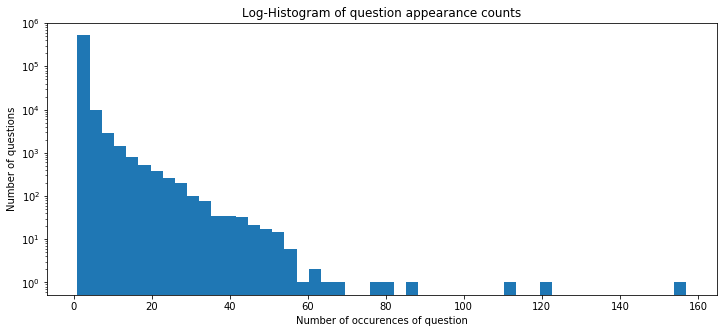

In [42]:
plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print()